In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
flat_chess = cv2.imread('DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

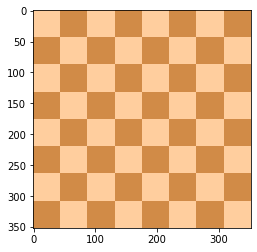

In [3]:
plt.imshow(flat_chess)

In [4]:
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)

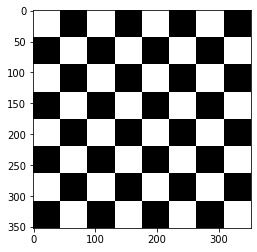

In [5]:
plt.imshow(gray_flat_chess, cmap='gray')

In [6]:
real_chess = cv2.imread('DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

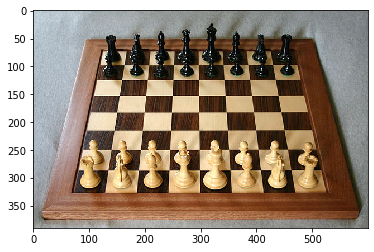

In [7]:
plt.imshow(real_chess)

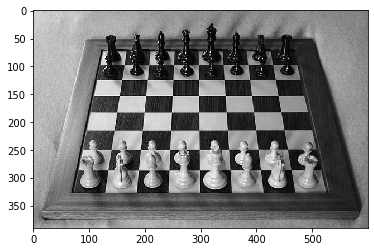

In [8]:
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess, cmap='gray')

#### Harris Corner Detection
Corners can be detected by looking for significant change in all directions

\begin{equation*}
\left(f(x,y) \right) = \left( \sum_{(x_k, y_k) \in W} (I(x_k, y_k) - I(x_k + \Delta x, y_k + \Delta y))^2 \right)
\end{equation*}

In [9]:
gray = np.float32(gray_flat_chess)
gray

array([[197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       ...,
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.]], dtype=float32)

In [10]:
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)

In [11]:
dst = cv2.dilate(dst, None)

In [12]:
flat_chess_copy = flat_chess.copy()
flat_chess_copy[dst>0.01*dst.max()] = [255, 0, 0] #RGB

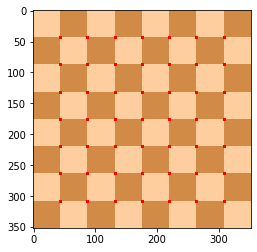

In [13]:
plt.imshow(flat_chess_copy)

In [14]:
gray = np.float32(gray_real_chess)

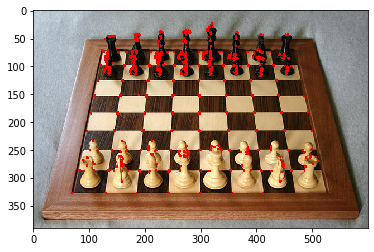

In [15]:
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(dst, None)
real_chess_copy = real_chess.copy()
real_chess_copy[dst>0.01*dst.max()] = [255, 0, 0]
plt.imshow(real_chess_copy)

#### Shi-Tomasi Corner Detection
Small modification to the Harris Corner Detector which ended up with better results

It changes the scoring function selection criteria that Harris uses for corner detection

Harris Corner Detector uses:
\begin{align}
R = \lambda_1\lambda_2 - k(\lambda_1 + \lambda_2)
\end{align}

Shi-Tomasi uses:
\begin{align}
R = min(\lambda_1, \lambda_2)
\end{align}

In [16]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess, 64, 0.01, 10)

In [17]:
corners

array([[[308., 308.]],

       [[264., 308.]],

       [[220., 308.]],

       [[176., 308.]],

       [[132., 308.]],

       [[ 88., 308.]],

       [[ 44., 308.]],

       [[308., 264.]],

       [[264., 264.]],

       [[220., 264.]],

       [[176., 264.]],

       [[132., 264.]],

       [[ 88., 264.]],

       [[ 44., 264.]],

       [[308., 220.]],

       [[264., 220.]],

       [[220., 220.]],

       [[176., 220.]],

       [[132., 220.]],

       [[ 88., 220.]],

       [[ 44., 220.]],

       [[308., 176.]],

       [[264., 176.]],

       [[220., 176.]],

       [[176., 176.]],

       [[132., 176.]],

       [[ 88., 176.]],

       [[ 44., 176.]],

       [[308., 132.]],

       [[264., 132.]],

       [[220., 132.]],

       [[176., 132.]],

       [[132., 132.]],

       [[ 88., 132.]],

       [[ 44., 132.]],

       [[308.,  88.]],

       [[264.,  88.]],

       [[220.,  88.]],

       [[176.,  88.]],

       [[132.,  88.]],

       [[ 88.,  88.]],

       [[ 44.,  

In [18]:
corners = np.int0(corners)

In [19]:
for i in corners:
    x, y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,(255,0,0), -1)

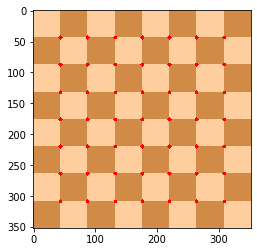

In [20]:
plt.imshow(flat_chess)

In [21]:
corners = cv2.goodFeaturesToTrack(gray_real_chess, 100, 0.01, 10)

In [22]:
corners = np.int0(corners)
for i in corners:
    x, y = i.ravel()
    cv2.circle(real_chess,(x,y),3,(255,0,0), -1)

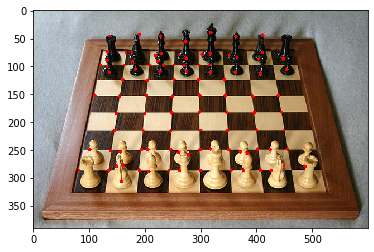

In [23]:
plt.imshow(real_chess)